# Final Project Template

For the final project for this module, you are asked to use ETL together with the skills you have learned about Python and MySQL in the previous modules to understand spending patterns.

This module's project is divided into two main parts: Extract-Transform-Load (ETL) and Analysis and Visualization.

Your challenge in this project is to implement the steps suggested by Dr. Sanchez in his videos throughout the module and prove that you have a a clear understanding of each of them by being able to describe and justify them. You will also be tested on your ability to conduct your own analysis to understand spending patterns.

Before you fill out the project outline template below, make sure you:

- Read through the template completely to understand the instructions for the structure of the project.
- Have a clear understanding of what to do to create a model that will return the results you want to find.
- Use Markdown to edit the template.
- Include any screenshots of your code (both Python and MySQL) and of your program windows (Excel, Terminal, VS Code, MySQL Workbench) to demonstrate your steps.

# MRTS Data ETL and Analysis - Trends, Percent Change, and Rolling Windows

**Mark Godek**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This is a brief description (150 words or less) of your analysis and the results of your model. Complete this portion of the template after you are done working on your project.

The goal of this project was to take Monthly Retail Trade Survey (MRTS) and input it into an SQL database, write SQL queries to pull out data to be analyzed, and produce analysis and visualizations using Python. Within the data I found there was a positive trend in Retail and Food Services in 2020. This included sporting goods and hobby, toy, and games stores but not books.

Men's and women's clothing sales were correlated and did not usually have large differences in percent change although men's slightly lagged sometimes. Anaylsis of rolling windows indicated that gasoline sales are seasonal, while prescription prices more stable.

[Back to top](#Index)


## 1. Introduction

Introduce your project using 300 words or less. Describe all the processes you followed to create your ETL, Analysis, and Visualization project. Start by summarizing the steps that you intend to perform and then elaborate on this section after you have completed your project.

To begin the project, the MRTS dataset was downloaded from the course website. I briefly explored the dataset in Excel before aggressively paring down the data. The adjusted data was removed because it was not stated how the data was adjusted and all rows with missing data were removed because I don't want to deal with missing data unless necessary.

The new data subset was saved as a csv file. The csv file was then read into a Python script with loaded the data into a SQL database. After the data was inserted into the SQL database, I conducted basic SQL queries on the business categories prompted by the assignment. DataFrames and plots were generated to visualize the data where appropriate. It was necessary to impute some data for men's clothing sales.

[Back to top](#Index)

## 2. Extract-Transform-Load

For each of the sections below, include a description of the steps you followed. Whenever possible, include screenshots of your code or program windows to demonstrate your steps.

[Back to top](#Index)

### 2.1 The ETL Process

Describe, using your own words, the key steps to perform ETL on the provided MRTS dataset.

The key steps to performing ETL on the provided MRTS dataset are:
- Saving the dataset locally
- Understanding what the dataset represents
- Subsetting the dataset into data we want to incorporate into the project
- Reading the csv file into Python
- Connecting the Python code to mySQL using the driver
- Creating target mySQL queries in Python (It is easier to write a functioning SQL statement and then a Python script which recreates it, than writing Python code until it produces a SQL statement that achieves the desired effect)
- Reading and processing the dataset to construct the target mySQL queries
- Executing the target mySQL queries to populate the database
- Creating mySQL queries to pull interesting data and feed it back to Python
- Analyze and create visualizations from the data using Python libraries

[Back to top](#Index)

### 2.2 Data Exploration

Describe the MRTS dataset and the data that it contains. Feel free to do some research online to get more information about the dataset. This step is fundamental and it will help you with the development of your project.

MRTS stands for "Monthly Retail Trade Survey." It contains voluntary responses of sales estimates from retail and food service stores. Other versions also contain inventory information, but this one seems to only contain sales. Sales for each year from 1992 to 2021 are broken down by month. Some data is missing, labeled as "suppressed" or "Not advailable," (the typo from the dataset) depending on the year. The estimates shown are in the millions of dollars, so "601" of household appliance store sales in January of 1992 are $601,000,000 of sales.

[Back to top](#Index)

### 2.3 Data Preparation

Describe which modifications you want to perform on your dataset so that it’s ready for analysis. A few obvious ones are suggested in the video, but come up with at least one modification on your own as well.


I made the following modifications to mrtssales92-present.xls:
- Use sheet for the year 2020 because it has a full year of data
- Delete the first column of data because I don't care about their NAICS codes
- Change "Kind of Business" to "BusinessType" and move it one cell lower in line with the other column headers
- Remove period and space from column headers representing the dates
- Change "TOTAL" to "TOTAL2020" so the year is explicitly stated
- Delete the row with "NOT ADJUSTED" as the only data
- Delete the "ADJUSTED(2)" row and all those below it
- Delete any row with (S) Suppressed data in any column

[Back to top](#Index)

### 2.4 Read the Data Using Python

Describe briefly how Python can be used to read CSV files.

The python package csv can be imported. The package includes a csv.reader function which can open and iterate over lines of a csv file. As they are iterated over, they can be processed how you like.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

Describe the sample dataset that you have defined to test your Python script to read CSV files and explain how you used Python to read it.

I made a simple csv file representing something like peoples' bank accounts. I stored a static path to the file as a string, used the open function to open the file, and passed the file handle to the csv reader. I then iterated over the lines in the reader and printed them to the screen.

In [2]:
import csv
path = r'C:\Users\markg\OneDrive\Data Engineering Course\Module 8 Final - ETL\toyDataset.csv'

with open(path) as file:
    reader = csv.reader(file)
    
    for line in reader:
        print(line)

['UniqueID', 'Name', 'Date', 'Balance']
['1a', 'Jim', '4/14/2008', '0']
['2b', 'Harris', '12/11/2011', '25']
['3c', 'Liz', '5/18/1995', '2,000.00']
['4d', 'Casey', '8/1/2002', '23.43']
['5e', 'Jordan', '6/30/2019', '80']


[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

Describe how to read the MRTS CSV file using a Python script.

I read the MRTS CSV file exactly the same was I read the toy dataset. The differences came later in how the output from the reader was processed into mySQL queries.

In [3]:
path = r'C:\Users\markg\OneDrive\Data Engineering Course\Module 8 Final - ETL\2020MRTSsales.csv'

with open(path) as file:    
    for i in range(5):
        print(file.readline())

BusinessType,Jan2020,Feb2020,Mar2020,Apr2020,May2020,Jun2020,Jul2020,Aug2020,Sep2020,Oct2020,Nov2020,Dec2020,TOTAL2020

"Retail and food services sales, total","480,301","478,467","478,267","407,227","504,607","532,678","549,416","545,307","530,987","553,114","543,273","611,429","6,215,073"

Retail sales and food services excl motor vehicle and parts,"386,934","380,639","395,880","337,693","397,245","418,450","433,183","429,379","417,929","438,435","440,053","494,937","4,970,757"

Retail sales and food services excl gasoline stations,"440,605","441,504","444,006","380,417","472,562","496,364","510,540","506,577","493,756","514,953","508,879","574,794","5,784,957"

Retail sales and food services excl motor vehicle and parts and gasoline stations,"347,238","343,676","361,619","310,883","365,200","382,136","394,307","390,649","380,698","400,274","405,659","458,302","4,540,641"



[Back to top](#Index)

### 2.5 Writing an Installation Script

Describe how you wrote a Python installation script to read your dataset in MySQL WorkBench.

##### Load packages, the path to the dataset, and read the configuration for the mySQL connection

In [4]:
import yaml
import mysql.connector

path = r'C:\Users\markg\OneDrive\Data Engineering Course\Module 8 Final - ETL\2020MRTSsales.csv'
    
#get mySQL server configuration from a yaml file
db = yaml.safe_load(open(r'C:\Users\markg\OneDrive\Data Engineering Course\Data Engineering\.venv\try_it2.yaml'))
config = {
    'user': db['user'],
    'password': db['password'],
    'host': db['host'],
    #'database': db['db'],
    'auth_plugin': 'mysql_native_password'
}

##### Create the database
- Connect to the mySQL server
- Print all databases on the server
- Create a 'Sales' database if it does not exist

In [5]:
#a function which creates a datanase from a csv file
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()
cursor.execute("SHOW DATABASES")
dbs = []

for x in cursor:
    dbs.append(x[0])
#print(dbs) # print databases to terminal
if 'Sales' not in dbs:
    try:
        cursor.execute("CREATE DATABASE Sales")
    except:
        print('Sales database exists')

Sales database exists


##### Read the dataset and insert the entries into mySQL
- Establish a connection to the mySQL server
- Use the 'Sales' database which was just created
- Drop a 'Sales2020' if one exists so we are starting fresh
- Create the 'Sales2020' table using a static string with the column names and their datatypes
- Read the csv file using the path provided above
- For each line in the csv file, construct an INSERT INTO mySQL statement, execute, and commit it

In [6]:
#a function that inserts entries into a table called 'Sales2020'
with open(path) as file:

    query = (f'USE Sales;')
    print(query)
    cursor.execute(query)

    query = (f'DROP TABLE IF EXISTS Sales2020;')
    print(query)
    cursor.execute(query)

    query = (f'CREATE TABLE Sales2020 (BusinessType varchar(255) NOT NULL, Jan2020 int, Feb2020 int, Mar2020 int, Apr2020 int, May2020 int, Jun2020 int, Jul2020 int, Aug2020 int, Sep2020 int, Oct2020 int, Nov2020 int, Dec2020 int, TOTAL2020 int, PRIMARY KEY (`BusinessType`));')
    print(query)
    cursor.execute(query)

    csv_reader = csv.reader(file)
    #ideas from https://stackoverflow.com/questions/38134503/csv-file-to-sql-insert-statement
    header = next(csv_reader)
    headers = map((lambda x: '`' + x + '`'), header)
    insert = 'INSERT INTO Sales2020  (' + ", ".join(headers) + ") "
    for row in csv_reader:
        key = row[0] #header is string
        row = row[1:] #other values are int
        values = []
        for x in row:
            values.append(int(x.replace(',', ''))) #remove commas from ints and store in a list
        row = '"' + key + '", ' + ', '.join(str(value) for value in values) #construct a comma-separated string of the ints
        query = insert + 'VALUES (' + row  +");"
        #print(query)
        cursor.execute(query)
        cnx.commit() #commit must be called on the connection when inserting or deleting

USE Sales;
DROP TABLE IF EXISTS Sales2020;
CREATE TABLE Sales2020 (BusinessType varchar(255) NOT NULL, Jan2020 int, Feb2020 int, Mar2020 int, Apr2020 int, May2020 int, Jun2020 int, Jul2020 int, Aug2020 int, Sep2020 int, Oct2020 int, Nov2020 int, Dec2020 int, TOTAL2020 int, PRIMARY KEY (`BusinessType`));



[Back to top](#Index)

## 3. Analysis and Visualization

For each of the sections below, make sure you include a description of the steps you followed. Whenever possible, include screenshots of your code or program windows to demonstrate your steps.

Here, describe the differences, advantages, and disadvantages of running *queries* against your dataset using the MySQL Workbench or a Python environment.

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

Describe which *queries* you ran against the MRTS dataset in MySQL Workbench to verify that everything worked as expected.

To verify the SQL database was working properly, I selected all entries in the sales2020 table.
I also used the TOTAL2020 column to generate the average sales for each business type and returned them in descending order.

```SQL
SELECT * FROM sales2020;

SELECT BusinessType, TOTAL2020 / 12 as Avg2020 
FROM Sales2020
ORDER BY Avg2020 DESC;
```

[Back to top](#Index)

### 3.2 Running Queries From Python

Describe how you tested the previous *queries* on the the MRTS dataset using a Python script and the Terminal window. 

To test the previous queries in Python, I created a function that would accept the query as a string and print the results to screen. I passed both of the queries above to the function to test it.

In [7]:
import pandas as pd
from pandas import DataFrame


def SQLquery(myQuery):
    print(myQuery)
    cursor.execute(myQuery)
   
    # read rows from the cursor, read column names from the cursor, then store them in a pandas dataframe
    rows = cursor.fetchall()
    columnsNames = [i[0] for i in cursor.description]
    df = pd.DataFrame(rows, columns=columnsNames)
    
    return(df)

print(SQLquery(f'SELECT * FROM Sales2020;'))
print(SQLquery(f'SELECT BusinessType, TOTAL2020 / 12 as Avg2020 FROM Sales2020 ORDER BY Avg2020 DESC;'))

SELECT * FROM Sales2020;
                                         BusinessType  Jan2020  Feb2020  \
0                   All other gen. merchandise stores     5913     6078   
1          Automobile and other motor vehicle dealers    85832    90586   
2                                  Automobile dealers    81214    85140   
3             Automotive parts, acc., and tire stores     7535     7242   
4                       Beer, wine, and liquor stores     4188     4318   
5                                         Book stores      990      593   
6   Building mat. and garden equip. and supplies d...    26966    26237   
7                  Building mat. and supplies dealers    23709    23025   
8                Clothing and clothing access. stores    16873    19232   
9                                     Clothing stores    12287    13439   
10                                  Department stores     8479     9067   
11  Department stores(excl. discount department st...     2146     2473   


[Back to top](#Index)

### 3.3 Explore Trends

Describe which *queries* you wrote the explore the differences in trends between various categories in your data.

In your submission make sure to answer the following:

- What is an economic trend and why is it considered an important measure to predict quantities, like spending patterns?
- What is the trend of the retail and food services categories? Can this data be displayed clearly or do you need to adjust some parameters to reduce extraneous details and be able to visualize a clean trend?
- When comparing businesses like bookstores, sporting goods stores, and hobbies, toys, and games stores, what is the highest trend of all of these options? Which one grew faster? Which one is higher? Is there a seasonal pattern? Were there any changes in 2020? Which is better, monthly or yearly? 

I selected all the data and moved it into Python because SQL a database language for storing data and Python is a general purpose language where manipulating and analyzing data is much easier. If the dataset were larger, I would subset my data more carefully.

- An economic trend is a pattern of economic activity going up or down over a period of time. Economic trends are important because they can be used to explain past behavior and predict future behavior. If you are an automobile manufacturer who is able to notice an decrease in spending on cars, you might use that information to make business decisions like decreasing production from last year's volume or considering layoffs.
- There was a positive trend in Retail and Food Services in 2020. The trend was able to be displayed clearly. 
- Sporting goods had both the highest and fastest trend. It is difficult to pick out seasonal trends from 2020 because of the Coronavirus pandemic.


SELECT * FROM Sales2020;


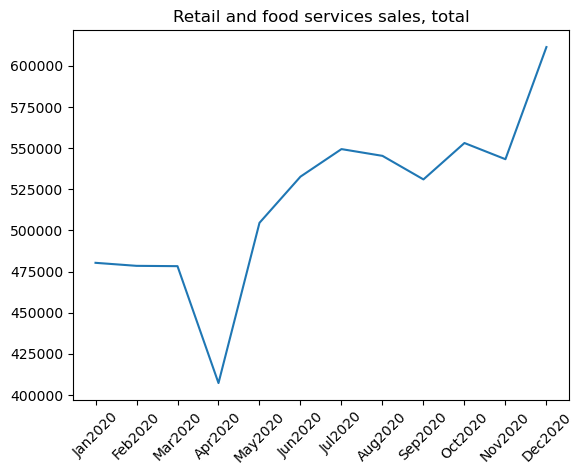

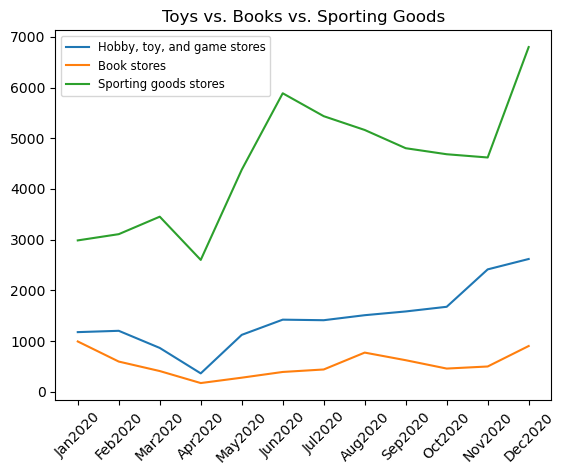

In [8]:
import matplotlib.pyplot as plt 
import datetime

# a function which takes a pandas dataframe, transposes it, and reapplies the previous column names
def transposeFrame(df):
    tf = df.transpose()
    header = tf.iloc[0]
    tf = tf[1:]
    tf.columns = header
    return tf

queryAll = SQLquery(f'SELECT * FROM Sales2020;')
sideQuery = transposeFrame(queryAll)

plt.plot(sideQuery.index[:12], sideQuery['Retail and food services sales, total'][:12])
plt.title('Retail and food services sales, total')
plt.xticks(rotation=45)
plt.show()

plt.plot(sideQuery.index[:12], sideQuery['Hobby, toy, and game stores'][:12], label='Hobby, toy, and game stores')
plt.plot(sideQuery.index[:12], sideQuery['Book stores'][:12], label='Book stores')
plt.plot(sideQuery.index[:12], sideQuery['Sporting goods stores'][:12], label='Sporting goods stores')
plt.legend(loc="upper left", fontsize='small')
plt.title('Toys vs. Books vs. Sporting Goods')
plt.xticks(rotation=45)
plt.show()


[Back to top](#Index)

### 3.4 Explore Percentage Change

Describe which *queries* you wrote to explore the differences in trends between various categories in your data.

In your submission make sure to answer the following:

- In economics, what is the percentage change and why is it considered an important measure to predict quantities like spending patterns?
- Consider the women's clothing and men's clothing businesses and their percentage change. How are these two businesses related? For each of the two businesses, what is the percentage of contribution to the whole and how does it change over time?

To explore percent change in men's and women's clothing sales, I selected only the women's column and used a function to transpose it. In my preprocessing, I had dropped all business types with suppressed sales data so I had to manually enter the men's clothing sales data for 2020. I used the average of the sales data that was present for men's clothing to fill the missing data.

- Percent change is an expression of the rate of change from one value to another as a percentage of the original number. Percentage change could be used in economics to describe how quickly a stock price is changing month to month, or changes in consumer spending habits year to year. This could be useful to spot trends and quantify how strong they are are.
- Men's and women's clothing sales seem to be correlated, althought it seems changes in men's clothing sales sometimes lag behind that of women's and tend to be lower than the women's percent change in the same time period.

SELECT * from sales2020 WHERE BusinessType = "Women's Clothing Stores";
         Men's Clothing Stores  Women's clothing stores
Jan2020                    NaN                      NaN
Feb2020               0.026711                 0.108243
Mar2020              -0.508943                -0.439144
Apr2020              -0.715232                -0.685867
May2020               0.802326                 1.343284
Jun2020               0.954839                 0.844404
Jul2020               0.336634                 0.170696
Aug2020              -0.064198                 0.005478
Sep2020               0.058047                 0.045264
Oct2020              -0.040150                 0.056135
Nov2020               0.000000                 0.034928
Dec2020               0.569239                 0.246882


C:\Users\markg\AppData\Local\Temp\ipykernel_1336\2915833170.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  print(pd.concat([mens.pct_change()[:12], womens.pct_change()[:12]], axis=1))
C:\Users\markg\AppData\Local\Temp\ipykernel_1336\2915833170.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plt.plot(womens.index[:12], womens.pct_change()[:12], label='Women\'s')


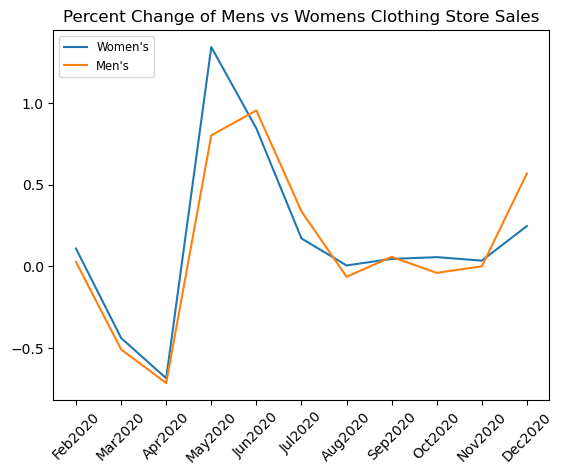

In [9]:
womensQuery = SQLquery(f'SELECT * from sales2020 WHERE BusinessType = "Women\'s Clothing Stores";')
womens = transposeFrame(womensQuery)

# impute missing sales of Mens Clothing Sales using the average sales for the year
mens = pd.DataFrame({'Men\'s Clothing Stores': [599, 615, 302, 86, 155, 303, 405, 379, 401, None, None, 604]}, index = womens.index[:12])
avgMensSales = sum(mens['Men\'s Clothing Stores'].dropna())/len(mens['Men\'s Clothing Stores'].dropna())
mens.fillna(avgMensSales, inplace = True)

print(pd.concat([mens.pct_change()[:12], womens.pct_change()[:12]], axis=1))

plt.plot(womens.index[:12], womens.pct_change()[:12], label='Women\'s')
plt.plot(mens.index[:12], mens.pct_change()[:12].values.reshape(len(mens)), label='Men\'s')
plt.legend(loc="upper left", fontsize='small')
plt.title('Percent Change of Mens vs Womens Clothing Store Sales')
plt.xticks(rotation=45)
plt.show()

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows


Describe which *queries* you wrote to explore the differences in trends between various categories in your data.

In your submission, make sure to answer the following:

- In economics, what is the rolling time window and why is it considered an important measure to predict quantities like spending patterns?
- Consider at least two businesses of your own from the MRTS data. Which *queries* did you write to analyze and produce graphs of rolling time windows for the chosen categories?

For analysis using rolling windows, I chose to look at catagories I thought people might spend in a cyclical manner. I used SQL to select the columns for gasoline stations and drug stores because people buy gasoline regularly but their driving habits change seasonally. I chose drug stores because people get prescriptions filled but their illness may not be chronic and they will stop purchasing, or they might get a prescription filled for several months at a time.

- Rolling time windows are a type of time series which a window of a specified size traverses over the data. Rolling time windows are useful when making predictive models because they can help identify if a dataset is consistent over time. Rolling windows would be another way to identify if sales in a type of business were seasonal.
- I chose pharmacies and gasoline because I would expect gasoline to be seasonal but pharmacies to be relatively stable.

SELECT * from sales2020 WHERE BusinessType = "Pharmacies and drug stores";
SELECT * from sales2020 WHERE BusinessType = "Gasoline stations";
BusinessType  Pharmacies and drug stores  Pharmacies and drug stores  \
Jan2020                            24440                         NaN   
Feb2020                            23183                         NaN   
Mar2020                            26974                24865.666667   
Apr2020                            23910                24689.000000   
May2020                            23648                24844.000000   
Jun2020                            24655                24071.000000   
Jul2020                            25460                24587.666667   
Aug2020                            24757                24957.333333   
Sep2020                            25237                25151.333333   
Oct2020                            26435                25476.333333   
Nov2020                            24294                25322.00000

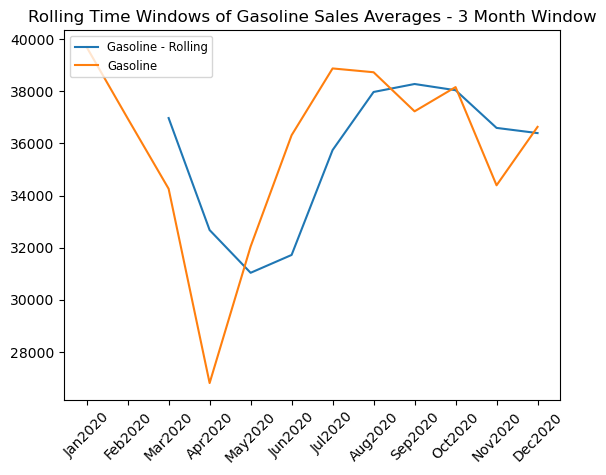

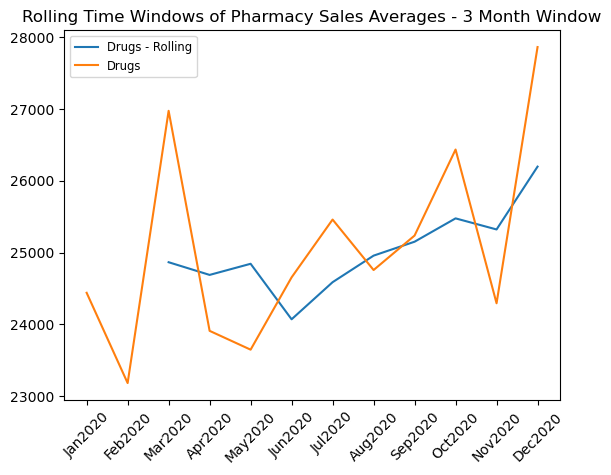

In [156]:
drugQuery = SQLquery(f'SELECT * from sales2020 WHERE BusinessType = "Pharmacies and drug stores";')
drugs = transposeFrame(drugQuery)

gasQuery = SQLquery(f'SELECT * from sales2020 WHERE BusinessType = "Gasoline stations";')
gas = transposeFrame(gasQuery)

print(pd.concat([drugs[:12], drugs[:12].rolling(3).sum()/3, drugs[:12].rolling(3).sum(), gas[:12], gas[:12].rolling(3).sum()/3, gas[:12].rolling(3).sum()], axis=1))

plt.plot(gas.index[:12], gas[:12].rolling(3).sum()/3, label='Gasoline - Rolling')
plt.plot(gas.index[:12], gas[:12], label='Gasoline')
plt.legend(loc="upper left", fontsize='small')
plt.title('Rolling Time Windows of Gasoline Sales Averages - 3 Month Window')
plt.xticks(rotation=45)
plt.show()

plt.plot(drugs.index[:12], drugs[:12].rolling(3).sum()/3, label='Drugs - Rolling')
plt.plot(drugs.index[:12], drugs[:12], label='Drugs')
plt.legend(loc="upper left", fontsize='small')
plt.title('Rolling Time Windows of Pharmacy Sales Averages - 3 Month Window')
plt.xticks(rotation=45)
plt.show()

[Back to top](#Index)

## Conclusion

Describe your conclusions. Which one of the businesses considered seems like it's going to attract the least spending? Which business seems likely to attract the most spending? 




I found there was an upward trend in Retail and food services sales after the rebound in March 2020. Hobby, toy, and games stores, as well as sporting goods sales also trended up while book sales did not. Men's and women's clothing sales shared very similar patterns of trending upward over time, while men's clothing sales slightly lagged and reached lower heights compared to those of women's. I also found that a 3-month rolling window is not large enough to smooth patterns for gasoline prices while it was a wide enough window to do so for pharmacy sales. I would be interested to see if a 12-month rolling window would even out trends in gasoline prices.

From the categories I analyzed men's and womens' clothing, toy, games, hobbies, books, pharmacy, and gasoline, it seemed like books will attract the least spending. The people like books already know they like books and shoppers apparently did not discover a new love of reading over the COVID pandemic. Furthermore, many people will choose to go to a library than a bookstore.

Sporting goods look like they might attract the most spending because it trended up very much toward the end of 2020. However, the MRTS data does not capture everything. Even the adjusted sales numbers explicitly state they do not adjust for price changes. Inflation picked up a lot just a few months after this data was published. Rampant spending was pointed at as one of the causes of the inflation, so really everything was attracting a lot of spending at the time.


[Back to top](#Index
)
## References

Add all references you used to complete this project.

Use this format for articles:
- Author Last Name, Author First Name. “Article Title.” Journal Title Volume #, no. Issue # (year): page range.

- Ex: Doe, John. “Data Engineering.” Data Engineering Journal 18, no. 4 (2021): 12-18.

Use this format for websites:
- Author Last Name, Author First Name. “Title of Web Page.” Name of Website. Publishing organization, publication or revision date if available. Access date if no other date is available. URL .

- Doe, John. “Data Engineering.” Data Engineer Resource. Cengage, 2021. www.dataengineerresource.com .


- "Monthly Retail Trade Survey - About the Monthly Retail Trade Survey." United States Census Bureau. July 5, 2024. https://www.census.gov/retail/mrts/about_the_surveys.html .
- Leroux, Sylvain. "MySQLdb.cursors.Cursor.execute does not work." Stack Exchange. July 5, 2024. https://stackoverflow.com/questions/18188264/mysqldb-cursors-cursor-execute-does-not-work .
- Cook, Declan. "CSV File to SQL Insert Statement." Stack Exchange. July 5, 2024. https://stackoverflow.com/questions/38134503/csv-file-to-sql-insert-statement .
- "Transposing Tables Using Python Pandas." Sisense. July 8, 2024. https://community.sisense.com/t5/knowledge/transposing-tables-using-python-pandas/ta-p/9428 .
- dm2. "Matplotlib Bar Graph Error - TypeError: only size-1 arrays can be converted to Python scalars." Stack Exchange. July 8, 2024. https://stackoverflow.com/questions/66154591/matplotlib-bar-graph-error-typeerror-only-size-1-arrays-can-be-converted-to-p .
- "Rolling Analysis of Time Series." Modeling Financial Time Series with S-PLUS®. p313. 2006. 
https://link.springer.com/chapter/10.1007/978-0-387-32348-0_9 ._9 .